In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y = mnist['data'], mnist['target']

In [4]:
x,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
digit= x[36001]
digit_image=digit.reshape(28,28) #reshaping it to plot it

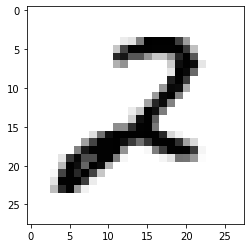

In [9]:
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [10]:
x_train, x_test= x[:60000], x[60000:]

In [11]:
y_train, y_test= y[:60000], y[60000:]

In [12]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train, y_train=x_train[shuffle_index], y_train[shuffle_index]

### Creating a 2 detector

In [13]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [14]:
y_train

array([8, 9, 3, ..., 2, 7, 5], dtype=int8)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf=LogisticRegression(solver='lbfgs')

In [17]:
clf.fit(x_train, y_train_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
clf.predict([digit])

array([ True])

### Cross validation

In [19]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy') #accuracy is not always a good metric

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [20]:
cvs.mean()

0.9786833333333332

### Create a classifier which classifies a digit always as not 2

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf, x_train, y_train_2, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [22]:
y_train_pred

array([False, False, False, ...,  True, False, False])

### Calculating Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_train_2,y_train_pred)
cm

array([[53572,   470],
       [  809,  5149]], dtype=int64)

### Precision, Recall and F1 score

In [25]:
from sklearn.metrics import precision_score,recall_score, f1_score

In [26]:
pre_score=precision_score(y_train_2,y_train_pred)
rec_score=recall_score(y_train_2,y_train_pred)
print(pre_score,rec_score)

0.9163552233493504 0.8642161799261497


In [27]:
f1_score(y_train_2,y_train_pred)

0.8895223287552906

### Precion Recall Curve

In [28]:
from sklearn.metrics import precision_recall_curve

In [29]:
y_scores=cross_val_predict(clf, x_train, y_train_2, cv=3, method='decision_function')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [30]:
y_scores

array([ -5.41000459, -17.79943768,  -3.83401941, ...,   4.95795943,
       -20.48360633,  -3.73917309])

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [32]:
precisions

array([0.10010249, 0.10008737, 0.10008905, ..., 1.        , 1.        ,
       1.        ])

In [33]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [34]:
thresholds

array([-27.52035972, -27.51688659, -27.51287917, ...,  16.64271755,
        19.08417212,  19.51242966])

### Plotting precision recall curve

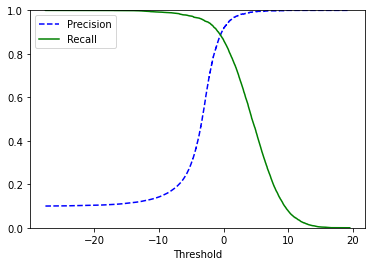

In [35]:
plt.plot(thresholds,precisions[:-1],'b--', label='Precision')
plt.plot(thresholds,recalls[:-1],'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### Testing the model

In [36]:
y_pred_final=clf.predict(x_test)
f1_score(y_pred_final, y_test_2)

0.8995943204868154

In [37]:
confusion_matrix(y_pred_final, y_test_2)

array([[8915,  145],
       [  53,  887]], dtype=int64)